# Foundations of AI search algorithms

## Basic data structure: Stack

In [115]:
class Stack:
    
    def __init__(self):
        self.stack = []
    
    def isEmpty(self):
        if len(self.stack) <= 0:
            return True
        else:
            return False
    
    def push(self, element):
        self.stack.append(element)
    
    def pop(self):
        return self.stack.pop()   

In [116]:
s = Stack()

s.push(1)
s.push(3)
s.push(10)
s.push(9)

In [119]:
print(s.stack)

[1, 3, 10]


In [118]:
s.pop()

9

## Basic data structure: Queue

In [120]:
class Queue:
    
    def __init__(self):
        self.queue = []
    
    def isEmpty(self):
        if len(self.queue) <= 0:
            return True
        else:
            return False
    
    def enqueue(self, element):
        self.queue.append(element)
    
    def dequeue(self):
        element = self.queue[0:1]  
        del self.queue[0]
        return  element

In [121]:
q = Queue()
q.enqueue(8)
q.enqueue(6)
q.enqueue(5)
q.enqueue(7)
q.enqueue(1)
q.enqueue(2)

In [124]:
print(q.queue)

[6, 5, 7, 1, 2]


In [123]:
q.dequeue()

[8]

## Basic data structure: Graph

In [109]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

class Graph:
    def __init__(self, maxNodes):
        self.maxNodex = maxNodes
        self.nodes = []
        self.edges = np.array([[0] * maxNodes] * maxNodes)
    
    def addNode(self, node):
        if len(self.nodes) >= 5:
            print('Max no. of nodes reached.')
        else:
            self.nodes.append(node)
        
    def addEdge(self, frm, to, weight):      
        fromIndex = self.nodes.index(frm)
        toIndex = self.nodes.index(to)
        
        self.edges[fromIndex][toIndex] = weight
    
    def successor(self, frm):
        succ = []
        
        fromIndex = self.nodes.index(frm)
        
        for idx, value in np.ndenumerate(self.edges[fromIndex]):
            if value > 0:
                succ.append(self.nodes[idx[0]])
        return succ
    
    def predecessor(self, to):
        pred = []
        
        toIndex = self.nodes.index(to)
        
        for idx, value in np.ndenumerate(self.edges[:,toIndex]):
            if value > 0:
                pred.append(self.nodes[idx[0]])
        return pred
    
    # Reference: 
    # https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
    def plotGraph(self):
        g = nx.DiGraph()
        for frmNode in self.nodes:
            frmIdx = self.nodes.index(frmNode)
            for toNode in self.nodes:                
                toIdx = self.nodes.index(toNode)
                if self.edges[frmIdx][toIdx] > 0:
                    g.add_edge(frmNode, 
                               toNode, 
                               weight = self.edges[frmIdx][toIdx])
        
        pos = nx.spring_layout(g)  # positions for all nodes

        # nodes
        nx.draw_networkx_nodes(g, 
                               pos, 
                               node_size=700)

        # edges
        nx.draw_networkx_edges(g, 
                               pos, 
                               width=3,
                               connectionstyle='arc3, rad = 0.1')

        # node labels
        nx.draw_networkx_labels(g, 
                                pos, 
                                font_size=20, 
                                font_family="sans-serif")
        # edge weight labels
        edge_labels = nx.get_edge_attributes(g, "weight")
        nx.draw_networkx_edge_labels(g, 
                                     pos, 
                                     edge_labels)

        ax = plt.gca()
        ax.margins(0.08)
        plt.axis("off")
        plt.tight_layout()
        plt.show()
        

In [110]:
g = Graph(5)
g.addNode('a')
g.addNode('b')
g.addNode('c')
g.addNode('d')
g.addNode('e')

In [113]:
print(g.nodes)
print(g.edges)

['a', 'b', 'c', 'd', 'e']
[[0 0 4 5 0]
 [0 0 3 0 0]
 [3 0 0 2 1]
 [0 0 0 0 1]
 [0 5 0 0 0]]


In [112]:
g.addEdge('a', 'd', 5)
g.addEdge('a', 'c', 4)
g.addEdge('b', 'c', 3)
g.addEdge('c', 'a', 3)
g.addEdge('c', 'e', 1)
g.addEdge('c', 'd', 2)
g.addEdge('d', 'e', 1)
g.addEdge('e', 'b', 5)

In [55]:
g.successor('c')

['d', 'e']

In [56]:
g.predecessor('c')

['a', 'b']

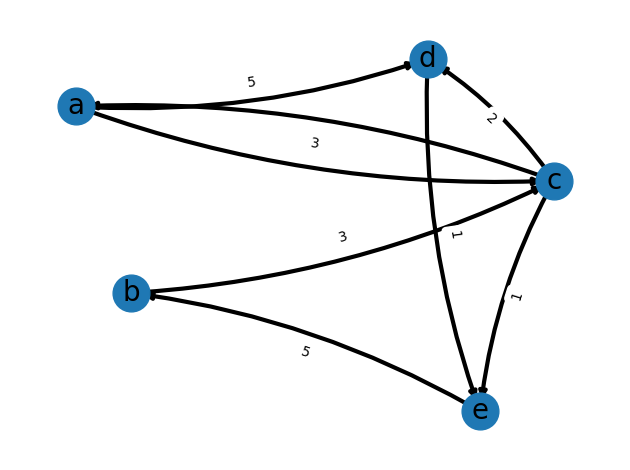

In [114]:
g.plotGraph()